# Assignment 6

CS4172 Machine Learning Lab

Name: Abhiroop Mukherjee

Enrolment Number: 510519109

## Task 1

Download and extract the flower image dataset from https://www.kaggle.com/alxmamaev/flowers-recognition.

## Task 2

The dataset contains five classes of flower images of variable sizenamely chamomile, tulip, rose, sunflower, dandelion. Resize all images to 80*80 pixels and convert all color images to grey images.

## Task 3

Randomly shuffle all images to create training, test set with ratio of 90:10, respectively. (Reduce the training size by 1/ 5 if computation resources are limited).

In [1]:
import tensorflow as tf
import random 

DATASET_DIRECTORY_PATH = '../ML_DRIVE/Assign_6/flowers/'
seed = random.randint(0,100)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory= DATASET_DIRECTORY_PATH,
    labels="inferred",
    label_mode="categorical", #output of model will be softmax categorical
    color_mode="grayscale",
    batch_size=32,
    image_size=(80,80),
    shuffle=True,
    seed=seed, #same seed for both dataset so that no overlap happens
    validation_split=0.1, #90:10 split
    subset='training',
    crop_to_aspect_ratio=False,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory= DATASET_DIRECTORY_PATH,
    labels="inferred",
    label_mode="categorical", #output of model will be softmax categorical
    color_mode="grayscale",
    batch_size=32,
    image_size=(80,80),
    shuffle=True,
    seed=seed,
    validation_split=0.1, #90:10 split
    subset='validation',
    crop_to_aspect_ratio=False,
)

Found 4317 files belonging to 5 classes.
Using 3886 files for training.


2022-10-13 15:29:20.216617: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-10-13 15:29:20.216738: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-F39PQO9I): /proc/driver/nvidia/version does not exist
2022-10-13 15:29:20.217469: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 4317 files belonging to 5 classes.
Using 431 files for validation.


In [2]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 80, 80, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## Task 4

Train a Convolutional neural network with max pooling and a fully connected layer at the top, to classify the flower images. Now run the network by changing the following hyper-parameters:

### Task 4.1

Analyze the performance of convolution window kernel size

| Convolution Layer | Convolution kernel_size | Convolution filters size | Pooling Layers | Activation | FC layer (after Flatten) | Regularization                  |
|-------------------|-------------------------|--------------------------|----------------|------------|--------------------------|---------------------------------|
| 3                 | (3\*3, 3\*3, 3\*3)         | \[16,32,64\]               | Max_Pooling    | Relu       | 1                        | Dropout of 0.1 after each layer |
| 3                 | (3\*3, 3\*3, 5\*5)         | \[16,32,64\]               | Max_Pooling    | Relu       | 1                        | Dropout of 0.1 after each layer |
| 3                 | (3\*3, 5\*5, 5\*5)         | \[16,32,64\]               | Max_Pooling    | Relu       | 1                        | Dropout of 0.1 after each layer |
| 3                 | (5\*5, 5\*5, 5\*5)         | \[16,32,64\]               | Max_Pooling    | Relu       | 1                        | Dropout of 0.1 after each layer |

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Input, MaxPool2D, Flatten

INPUT_SHAPE = (80,80,1)
NUM_CLASS = 5

model = Sequential()
model.add(Input(shape=INPUT_SHAPE))


model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu'
))
model.add(MaxPool2D())

model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu'
))
model.add(MaxPool2D())

model.add(Conv2D(
    filters=16,
    kernel_size=(3, 3),
    activation='relu'
))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(units=NUM_CLASS, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0

Epoch 1/2
122/122 [==============================] - 18s 134ms/step - loss: 1.6557 - accuracy: 0.2452 - val_loss: 1.5985 - val_accuracy: 0.2135
Epoch 2/2
122/122 [==============================] - 16s 129ms/step - loss: 1.5908 - accuracy: 0.2715 - val_loss: 1.5808 - val_accuracy: 0.2483


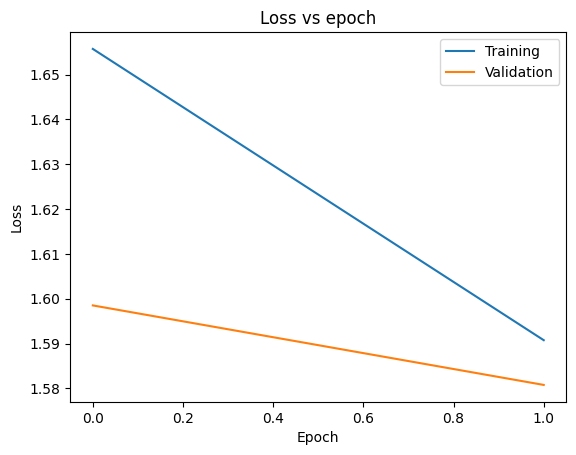

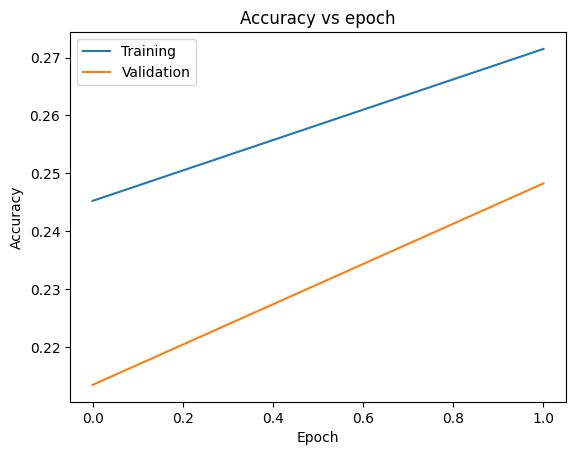

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

model.compile(loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x=train_dataset,
                    epochs=100,
                    verbose='auto',
                    callbacks=[
                            EarlyStopping(
                                monitor='val_loss',
                                patience=5,
                                restore_best_weights=True
                            )
                    ],
                    validation_data=val_dataset
                    )

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.title(f'Loss vs epoch')
plt.show()

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title(f'Accuracy vs epoch')
plt.show()
